<a href="https://colab.research.google.com/github/casjunior93/projeto-integrador-iv/blob/main/PI_IV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas fundamentais

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import scipy.stats as stats

#Configura o pandas para não exibir resultados em notação científica
pd.options.display.float_format = '{:.2f}'.format

#Semente aleatória do Numpy
np.random.seed(42)

#Data local
import locale
# Colab não suporta
#locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

# URL base da api de dados

In [2]:
url_base = 'https://univesp-analytics.vercel.app/api/get'

# Lendo Json com Pandas

In [3]:
import urllib.request, json 
from pandas.io.json import json_normalize

pagina = 1
limite = 10000

In [4]:
%%time
''' fim_iteracao_api = False
df_dados_api_original = pd.DataFrame([])

print(f'Início das requisições')
while fim_iteracao_api == False:
  with urllib.request.urlopen(url_base + '?page=' + str(pagina) + '&limite=' + str(limite)) as url:
    data = json.loads(url.read().decode())
    df = pd.DataFrame(json_normalize(data))
    if len(data) == 0:
      print(f'Fim. Total de {pagina - 1} páginas.')
      fim_iteracao_api = True
    else:
      if pagina % 100 == 0:
        print(f'Fim leitura página {pagina}')
      pagina += 1
      df_dados_api_original = pd.concat([df_dados_api_original, df], ignore_index = True) '''

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


" fim_iteracao_api = False\ndf_dados_api_original = pd.DataFrame([])\n\nprint(f'Início das requisições')\nwhile fim_iteracao_api == False:\n  with urllib.request.urlopen(url_base + '?page=' + str(pagina) + '&limite=' + str(limite)) as url:\n    data = json.loads(url.read().decode())\n    df = pd.DataFrame(json_normalize(data))\n    if len(data) == 0:\n      print(f'Fim. Total de {pagina - 1} páginas.')\n      fim_iteracao_api = True\n    else:\n      if pagina % 100 == 0:\n        print(f'Fim leitura página {pagina}')\n      pagina += 1\n      df_dados_api_original = pd.concat([df_dados_api_original, df], ignore_index = True) "

In [5]:
%%time
with urllib.request.urlopen(url_base + '?page=' + str(pagina) + '&limite=' + str(limite)) as url:
    data = json.loads(url.read().decode())
    df_dados_api_original = pd.DataFrame(json_normalize(data))

CPU times: user 195 ms, sys: 20.2 ms, total: 215 ms
Wall time: 2.57 s


Cópia dos dados da api

In [6]:
df_dados_api = df_dados_api_original.copy()

Dimensão dos dados - Linhas, colunas

In [7]:
df_dados_api.shape

(9598, 8)

# Visualizando dados originais

Mudando ordenação dos dados

In [8]:
df_dados_api.sort_index(ascending=False, inplace=True, ignore_index=True)

Cinco primeiros registros do dataframe - Em ordem da disposição na API

In [9]:
df_dados_api.head()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
0,63fea0720dd58484fc266c80,NaN,NaN,NaN,NaN,NaN,NaN,123.00
1,63ffdbb91a4eb0dfdd6a11a7,2,3,teste,2023-03-01T23:11:53.036Z,01/03/2023,20:11:53,NaN
2,63ffdbde1a4eb0dfdd6a11a8,10,10,teste,2023-03-01T23:12:30.063Z,01/03/2023,20:12:30,NaN
3,63ffdea6722bef68acc5bb72,333,333,teste,2023-03-01T23:24:21.438Z,01/03/2023,23:24:21,NaN
4,63ffed2b38c8784e07b788f2,15,15,teste,01/03/2023 21:26:19,01/03/2023,21:26:19,NaN


Cinco últimos registros do dataframe

In [10]:
df_dados_api.tail()

,_id,temp_ar,umid_ar,type,time.time_js,time.data,time.hora,teste
9593,641fae22708e4c1bfdcb373f,26.70,55,teste,"25/03/2023, 23:29:54","25/03/2023,",23:29:54,NaN
9594,641fae4c708e4c1bfdcb3740,26.70,56,teste,"25/03/2023, 23:30:36","25/03/2023,",23:30:36,NaN
9595,641fae76708e4c1bfdcb3741,26.70,56,teste,"25/03/2023, 23:31:18","25/03/2023,",23:31:18,NaN
9596,641faea0708e4c1bfdcb3742,26.70,56,teste,"25/03/2023, 23:32:00","25/03/2023,",23:32:00,NaN
9597,641faeca708e4c1bfdcb3743,26.70,56,teste,"25/03/2023, 23:32:42","25/03/2023,",23:32:42,NaN


Verificando dados nulos

In [11]:
df_dados_api.isnull().sum()

_id                0
temp_ar            3
umid_ar            3
type               1
time.time_js       1
time.data          1
time.hora          1
teste           9597
dtype: int64

Excluindo colunas desnecessárias

In [12]:
del df_dados_api['teste']
del df_dados_api['_id']
del df_dados_api['type']
del df_dados_api['time.time_js']
df_dados_api.head()

,temp_ar,umid_ar,time.data,time.hora
0,NaN,NaN,NaN,NaN
1,2,3,01/03/2023,20:11:53
2,10,10,01/03/2023,20:12:30
3,333,333,01/03/2023,23:24:21
4,15,15,01/03/2023,21:26:19


Limpeza de dados nulos

In [13]:
df_dados_api.dropna(inplace = True)
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Removendo dados duplicados

In [14]:
df_dados_api.shape

(9595, 4)

In [15]:
df_dados_api.drop_duplicates(inplace=True, ignore_index=True)
df_dados_api.shape

(9595, 4)

# Comportamento das variáveis

Tipo dos dados e convertendo strings para float

In [16]:
df_dados_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   temp_ar    9595 non-null   object
 1   umid_ar    9595 non-null   object
 2   time.data  9595 non-null   object
 3   time.hora  9595 non-null   object
dtypes: object(4)
memory usage: 300.0+ KB


In [17]:
df_dados_api = df_dados_api.astype({'temp_ar':'float', 'umid_ar':'float'})
df_dados_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp_ar    9595 non-null   float64
 1   umid_ar    9595 non-null   float64
 2   time.data  9595 non-null   object 
 3   time.hora  9595 non-null   object 
dtypes: float64(2), object(2)
memory usage: 300.0+ KB


Análise descritiva dos dados

In [18]:
df_dados_api.describe()

,temp_ar,umid_ar
count,9595.00,9595.00
mean,26.72,53.89
std,6.29,7.05
min,2.00,3.00
25%,26.20,51.00
50%,26.50,54.00
75%,26.80,57.00
max,333.00,333.00


Opa, parece haver outliers.

Verificando outliers

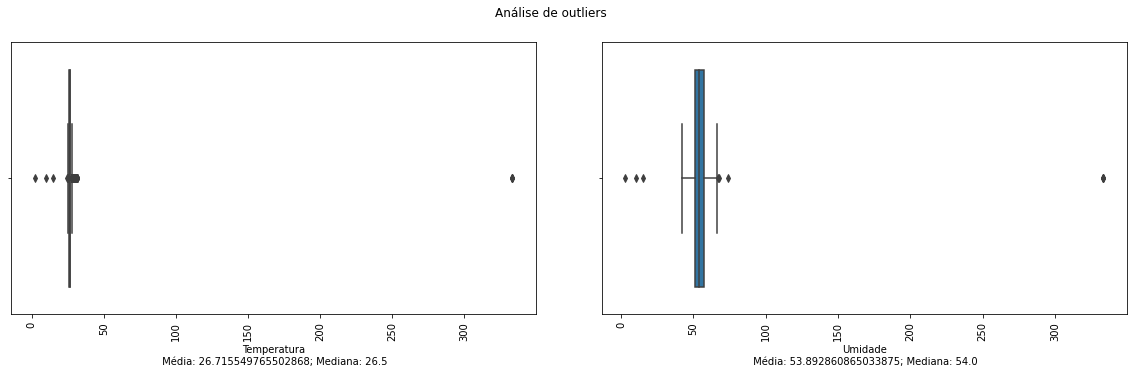

CPU times: user 429 ms, sys: 38.3 ms, total: 467 ms
Wall time: 706 ms


In [19]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Análise de outliers')

#Temperatura - Boxplot
sns.boxplot(ax=axes[0],x=df_dados_api['temp_ar'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Temperatura\n Média: ' + str(df_dados_api['temp_ar'].mean()) + '; Mediana: ' + str(df_dados_api['temp_ar'].median()))

#Umidade - Boxplot
sns.boxplot(ax=axes[1],x=df_dados_api['umid_ar'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Umidade\n Média: ' + str(df_dados_api['umid_ar'].mean()) + '; Mediana: ' + str(df_dados_api['umid_ar'].median()))

plt.show();

Excluindo outliers

In [20]:
def limites_outliers(coluna):
  Q1 = coluna.quantile(.25)
  Q3 = coluna.quantile(.75)
  IIQ = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IIQ
  limite_superior = Q3 + 1.5 * IIQ
  return limite_inferior, limite_superior

In [21]:
limite_inferior_temp_ar, limite_superior_temp_ar = limites_outliers(df_dados_api['temp_ar'])
limite_inferior_umid_ar, limite_superior_umid_ar = limites_outliers(df_dados_api['umid_ar'])

In [22]:
selecao_temp_ar = (df_dados_api['temp_ar'] >= limite_inferior_temp_ar) & (df_dados_api['temp_ar'] <= limite_superior_temp_ar)
df_dados_api = df_dados_api[selecao_temp_ar]

In [23]:
selecao_umid_ar = (df_dados_api['umid_ar'] >= limite_inferior_umid_ar) & (df_dados_api['umid_ar'] <= limite_superior_umid_ar)
df_dados_api = df_dados_api[selecao_umid_ar]

Revendo boxplots

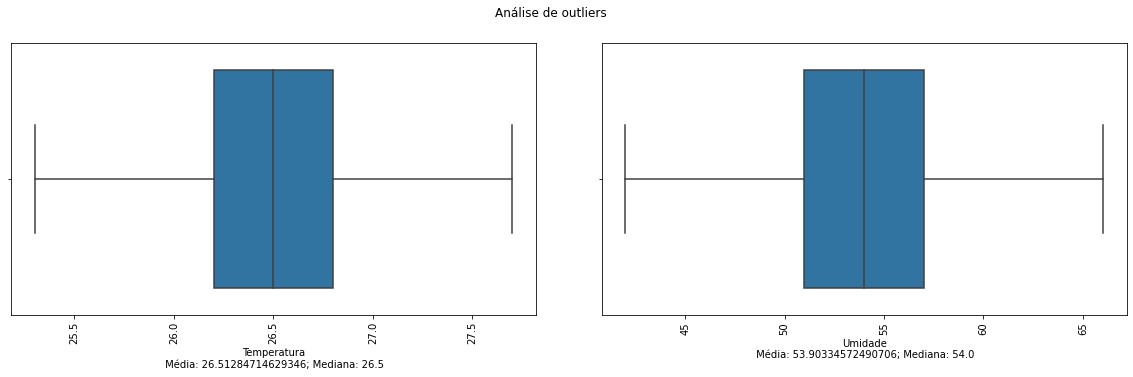

CPU times: user 384 ms, sys: 39.2 ms, total: 423 ms
Wall time: 628 ms


In [24]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Análise de outliers')

#Temperatura - Boxplot
sns.boxplot(ax=axes[0],x=df_dados_api['temp_ar'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Temperatura\n Média: ' + str(df_dados_api['temp_ar'].mean()) + '; Mediana: ' + str(df_dados_api['temp_ar'].median()))

#Umidade - Boxplot
sns.boxplot(ax=axes[1],x=df_dados_api['umid_ar'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Umidade\n Média: ' + str(df_dados_api['umid_ar'].mean()) + '; Mediana: ' + str(df_dados_api['umid_ar'].median()))

plt.show();

Agora as curvas de densidade das variáveis

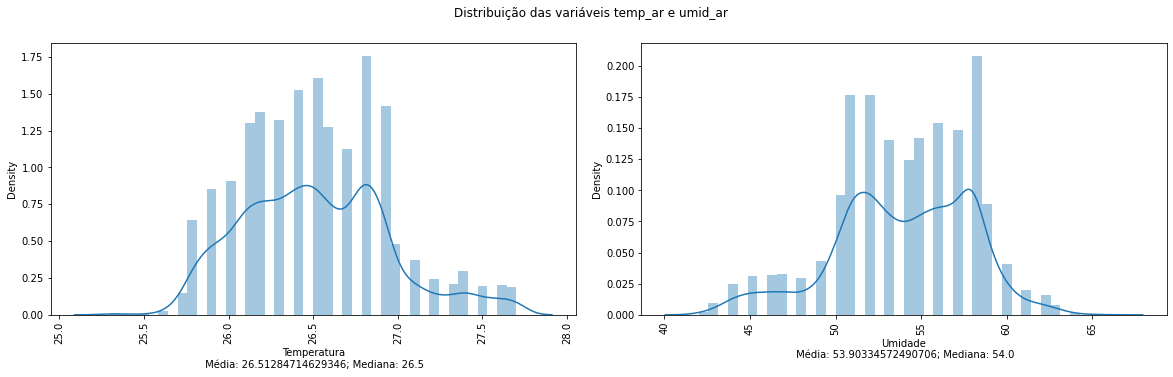

CPU times: user 920 ms, sys: 97.6 ms, total: 1.02 s
Wall time: 1.26 s


In [25]:
%%time
fig, axes = plt.subplots(1, 2, figsize = (20,5))
fig.subplots_adjust(hspace=0.5, wspace=0.125)
fig.suptitle('Distribuição das variáveis temp_ar e umid_ar')

#Temperatura - distplot
sns.distplot(ax=axes[0],x=df_dados_api['temp_ar'])
axes[0].tick_params(axis='x', rotation=90)
axes[0].set(xlabel='Temperatura\n Média: ' + str(df_dados_api['temp_ar'].mean()) + '; Mediana: ' + str(df_dados_api['temp_ar'].median()))

#Umidade - distplot
sns.distplot(ax=axes[1],x=df_dados_api['umid_ar'])
axes[1].tick_params(axis='x', rotation=90)
axes[1].set(xlabel='Umidade\n Média: ' + str(df_dados_api['umid_ar'].mean()) + '; Mediana: ' + str(df_dados_api['umid_ar'].median()))

plt.show();

Testando se as distruições são normais

In [26]:
%%time
stat_temp_ar,p_temp_ar = stats.shapiro(df_dados_api['temp_ar'].to_numpy())
stat_umid_ar,p_umid_ar = stats.shapiro(df_dados_api['umid_ar'].to_numpy())

CPU times: user 1.9 ms, sys: 0 ns, total: 1.9 ms
Wall time: 1.92 ms


In [27]:
print(f'p-value temp_ar: {p_temp_ar:.5f}')
print(f'p-value umid_ar: {p_umid_ar:.5f}')

p-value temp_ar: 0.00000
p-value umid_ar: 0.00000


Com os p_values < 0.5, logo curvas não normais.

# Tratando data

Copiando dataframe para uma nova variável

In [28]:
dados_projeto = df_dados_api.copy()
dados_projeto

,temp_ar,umid_ar,time.data,time.hora
31,26.60,61.00,"02/03/2023,",08:02:36
32,26.70,61.00,"02/03/2023,",08:07:40
33,26.90,55.00,"02/03/2023,",08:17:50
34,27.10,54.00,"02/03/2023,",08:22:52
35,27.30,55.00,"02/03/2023,",08:27:55
...,...,...,...,...
9590,26.70,55.00,"25/03/2023,",23:29:54
9591,26.70,56.00,"25/03/2023,",23:30:36
9592,26.70,56.00,"25/03/2023,",23:31:18
9593,26.70,56.00,"25/03/2023,",23:32:00


Removendo virgula de time.data e concatenando com time.hora para gerar data no formato datetime

In [29]:
def converte_data_portugues_para_ingles(df):
  return datetime.strptime(df['time.data'], "%d/%m/%Y").strftime("%Y-%m-%d");

In [30]:
dados_projeto['time.data'] = dados_projeto['time.data'].str.replace(',','')
dados_projeto['time.data'] = dados_projeto.apply(lambda x: converte_data_portugues_para_ingles(x), axis=1)
dados_projeto['data'] = dados_projeto['time.data'] + ' ' + dados_projeto['time.hora']
dados_projeto['data'] = dados_projeto['data'].astype('datetime64[ns]')
dados_projeto.head()

,temp_ar,umid_ar,time.data,time.hora,data
31,26.60,61.00,2023-03-02,08:02:36,2023-03-02 08:02:36
32,26.70,61.00,2023-03-02,08:07:40,2023-03-02 08:07:40
33,26.90,55.00,2023-03-02,08:17:50,2023-03-02 08:17:50
34,27.10,54.00,2023-03-02,08:22:52,2023-03-02 08:22:52
35,27.30,55.00,2023-03-02,08:27:55,2023-03-02 08:27:55


In [31]:
dados_projeto.tail()

,temp_ar,umid_ar,time.data,time.hora,data
9590,26.70,55.00,2023-03-25,23:29:54,2023-03-25 23:29:54
9591,26.70,56.00,2023-03-25,23:30:36,2023-03-25 23:30:36
9592,26.70,56.00,2023-03-25,23:31:18,2023-03-25 23:31:18
9593,26.70,56.00,2023-03-25,23:32:00,2023-03-25 23:32:00
9594,26.70,56.00,2023-03-25,23:32:42,2023-03-25 23:32:42


In [32]:
dados_projeto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 31 to 9594
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   temp_ar    9146 non-null   float64       
 1   umid_ar    9146 non-null   float64       
 2   time.data  9146 non-null   object        
 3   time.hora  9146 non-null   object        
 4   data       9146 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 428.7+ KB


Verificando nulos novamente

In [33]:
df_dados_api.isnull().sum()

temp_ar      0
umid_ar      0
time.data    0
time.hora    0
dtype: int64

Visualizando contagem de registros agrupados por dia

In [34]:
dados_projeto.groupby(by="time.data").count()

,temp_ar,umid_ar,time.hora,data
time.data,,,,
2023-03-02,117,117,117,117
2023-03-03,282,282,282,282
2023-03-04,285,285,285,285
2023-03-05,286,286,286,286
2023-03-06,285,285,285,285
2023-03-07,284,284,284,284
2023-03-08,271,271,271,271
2023-03-09,286,286,286,286
2023-03-10,243,243,243,243


Deletando colunas que não vamos usar mais

In [35]:
del dados_projeto['time.data']
del dados_projeto['time.hora']

In [36]:
dados_projeto.head()

,temp_ar,umid_ar,data
31,26.60,61.00,2023-03-02 08:02:36
32,26.70,61.00,2023-03-02 08:07:40
33,26.90,55.00,2023-03-02 08:17:50
34,27.10,54.00,2023-03-02 08:22:52
35,27.30,55.00,2023-03-02 08:27:55


In [37]:
dados_projeto.tail()

,temp_ar,umid_ar,data
9590,26.70,55.00,2023-03-25 23:29:54
9591,26.70,56.00,2023-03-25 23:30:36
9592,26.70,56.00,2023-03-25 23:31:18
9593,26.70,56.00,2023-03-25 23:32:00
9594,26.70,56.00,2023-03-25 23:32:42


# Filtro por período a partir do dia 04/03/2023

In [38]:
filtro = (dados_projeto.data >= '2023-03-04 00:00:00') & (dados_projeto.data <= '2023-03-26 00:00:00')
serie = dados_projeto.loc[filtro]
serie

,temp_ar,umid_ar,data
504,26.60,57.00,2023-03-04 00:04:12
505,26.60,58.00,2023-03-04 00:09:14
506,26.60,57.00,2023-03-04 00:14:16
507,26.60,57.00,2023-03-04 00:19:18
508,26.60,57.00,2023-03-04 00:24:21
...,...,...,...
9590,26.70,55.00,2023-03-25 23:29:54
9591,26.70,56.00,2023-03-25 23:30:36
9592,26.70,56.00,2023-03-25 23:31:18
9593,26.70,56.00,2023-03-25 23:32:00


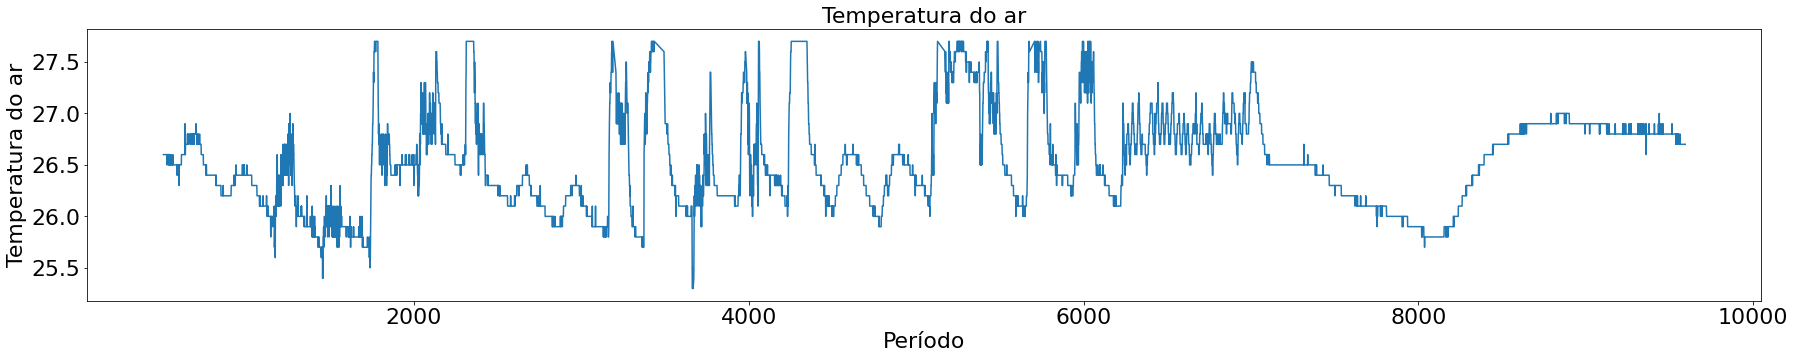

CPU times: user 644 ms, sys: 57.1 ms, total: 701 ms
Wall time: 1.15 s


In [39]:
%%time
plt.figure(figsize=(30,5))
serie.temp_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Temperatura do ar',size=22)
plt.title('Temperatura do ar',size=22)

plt.savefig('data_temp_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

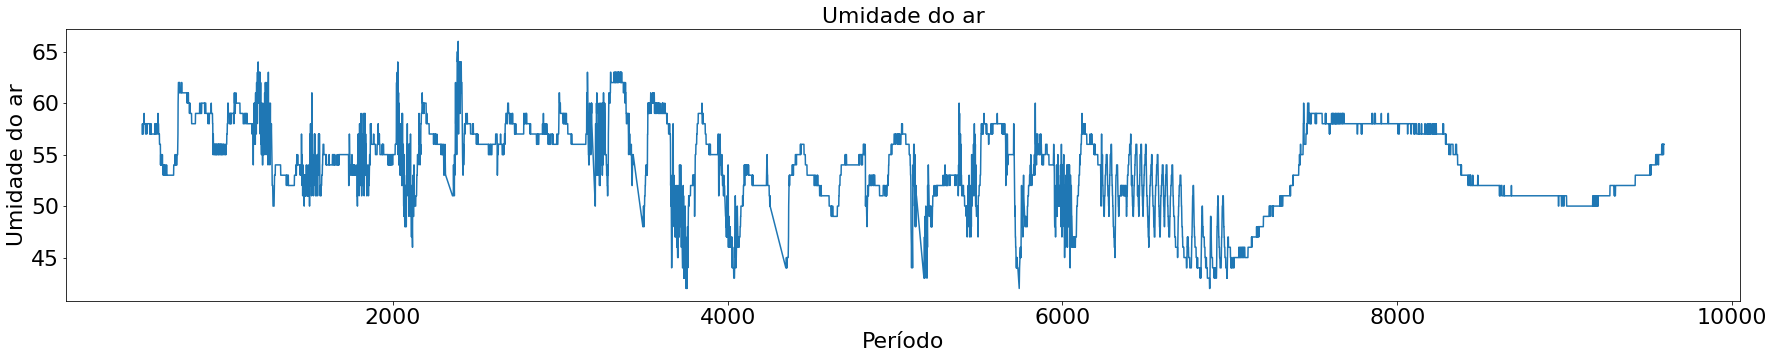

CPU times: user 613 ms, sys: 41 ms, total: 654 ms
Wall time: 863 ms


In [40]:
%%time
plt.figure(figsize=(30,5))
serie.umid_ar.plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Período',size=22)
plt.ylabel('Umidade do ar',size=22)
plt.title('Umidade do ar',size=22)

plt.savefig('data_umidade_ar_conjunto_tratado_original.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

# Agrupando dados a cada t minuto(s) utilizando a média

Definindo os minutos

In [41]:
minutos = 30

Setando a data como index

In [42]:
serie.set_index('data', inplace=True)

In [43]:
serie

,temp_ar,umid_ar
data,,
2023-03-04 00:04:12,26.60,57.00
2023-03-04 00:09:14,26.60,58.00
2023-03-04 00:14:16,26.60,57.00
2023-03-04 00:19:18,26.60,57.00
2023-03-04 00:24:21,26.60,57.00
...,...,...
2023-03-25 23:29:54,26.70,55.00
2023-03-25 23:30:36,26.70,56.00
2023-03-25 23:31:18,26.70,56.00


Agrupando os valores de data para cada t minuto(s) pela média

In [44]:
%%time
dados_agrupados_minutos = serie.resample(str(minutos) + 'T').mean()
dados_agrupados_minutos.head()

CPU times: user 7.81 ms, sys: 978 µs, total: 8.78 ms
Wall time: 44.6 ms


,temp_ar,umid_ar
data,,
2023-03-04 00:00:00,26.60,57.17
2023-03-04 00:30:00,26.60,58.00
2023-03-04 01:00:00,26.60,58.00
2023-03-04 01:30:00,26.58,57.60
2023-03-04 02:00:00,26.60,57.83


Tamanho do conjunto gerado

In [45]:
dados_agrupados_minutos.shape

(1056, 2)

Verificando nulos

In [46]:
dados_agrupados_minutos.isnull().sum()

temp_ar    54
umid_ar    54
dtype: int64

Preenchendo nulos com os valores anteriores

In [47]:
dados_agrupados_minutos.fillna(method="ffill", inplace = True)

Verificando novamente os nulos

In [48]:
dados_agrupados_minutos.isnull().sum()

temp_ar    0
umid_ar    0
dtype: int64

# Gráficos

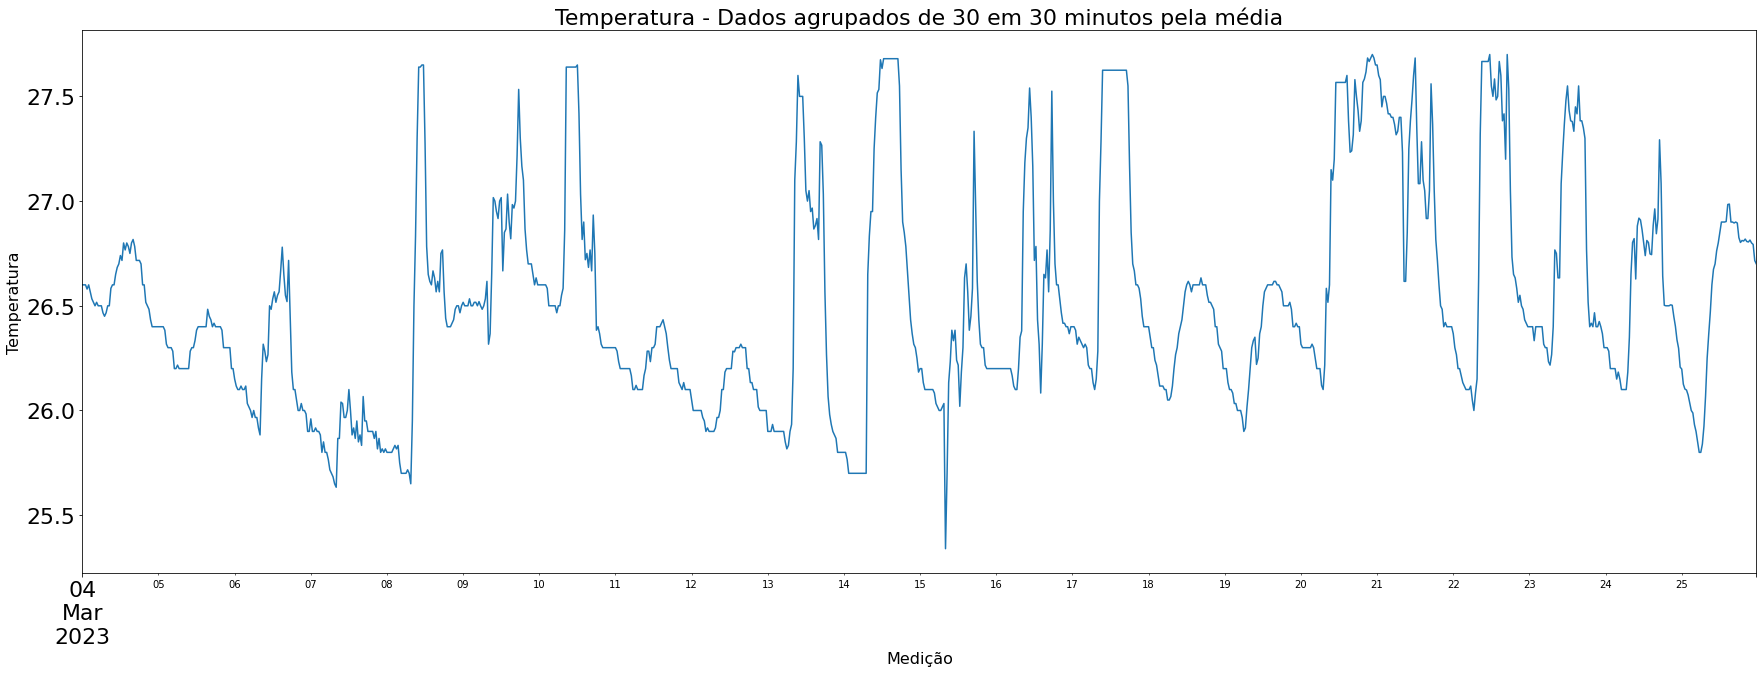

CPU times: user 1.04 s, sys: 70.3 ms, total: 1.11 s
Wall time: 1.42 s


In [49]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['temp_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=16)
plt.ylabel('Temperatura',size=16)
plt.title(f'Temperatura - Dados agrupados de {minutos} em {minutos} minutos pela média',size=22)

plt.savefig(f'data_temperatura_ar_conjunto_dados_agrupados_{minutos}_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()

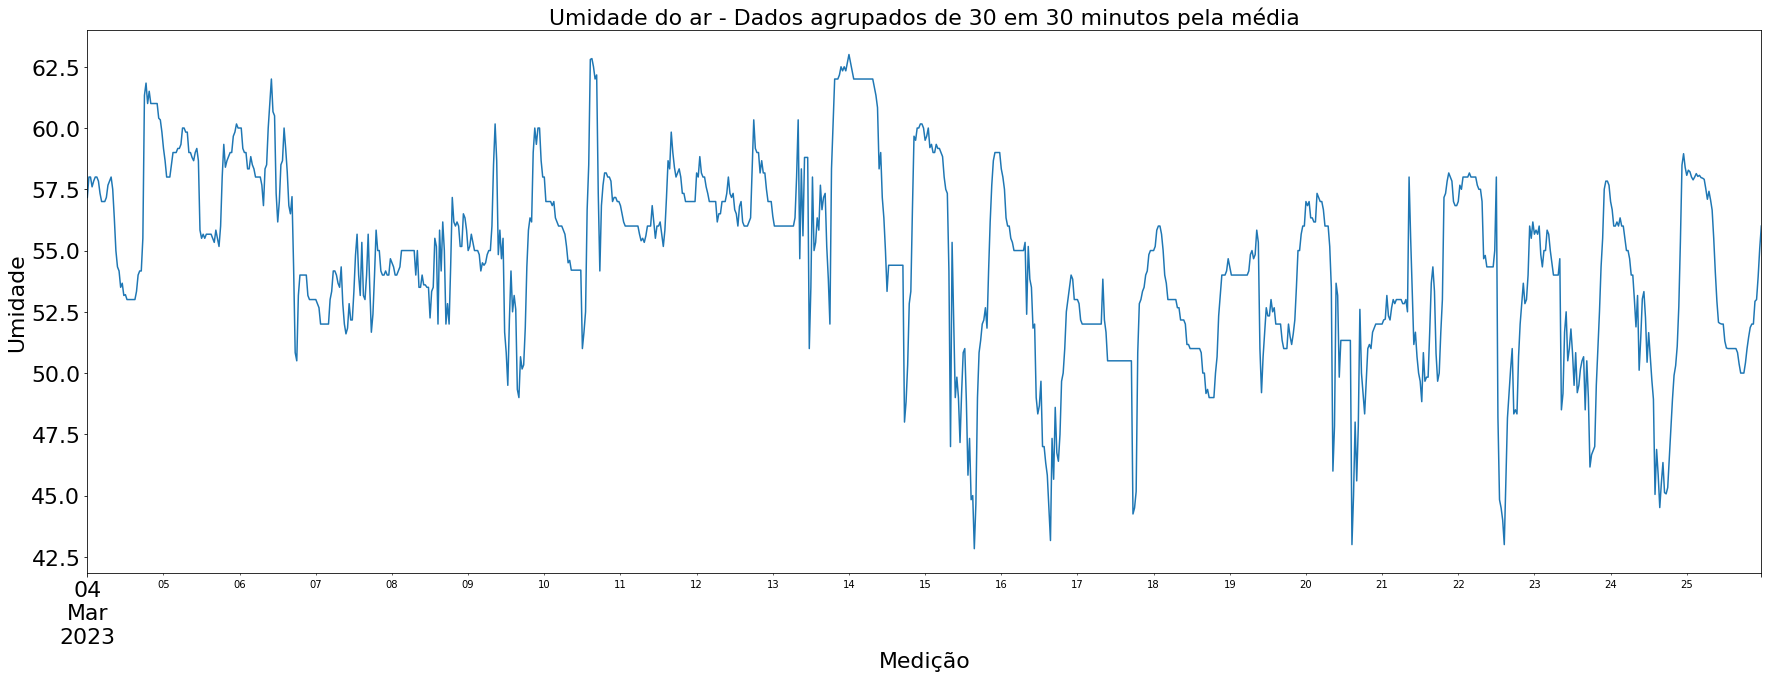

CPU times: user 1.15 s, sys: 57.5 ms, total: 1.2 s
Wall time: 2.3 s


In [50]:
%%time
plt.figure(figsize=(30,10))
dados_agrupados_minutos['umid_ar'].plot()
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xlabel('Medição',size=22)
plt.ylabel('Umidade',size=22)
plt.title(f'Umidade do ar - Dados agrupados de {minutos} em {minutos} minutos pela média',size=22)

plt.savefig(f'data_umidade_ar_conjunto_dados_agrupados_{minutos}_minutos.png', facecolor='white', transparent=False)  
plt.show() 
plt.close()

plt.show()